In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
# Load the Dataframe
reviews_df23 =pd.read_csv("../airbnb_reviews_oct_1_2023.csv")

In [4]:
reviews_df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983621 entries, 0 to 983620
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  983621 non-null  int64 
 1   date        983621 non-null  object
dtypes: int64(1), object(1)
memory usage: 15.0+ MB


In [5]:
time_series_count = reviews_df23['date'].value_counts()

In [6]:
date = np.array(time_series_count.index)

count = np.array(time_series_count)

display(date[:5])
display(count[:5])

array(['2023-09-04', '2023-04-30', '2023-05-29', '2023-05-21',
       '2023-08-20'], dtype=object)

array([1854, 1786, 1635, 1628, 1622], dtype=int64)

In [7]:
review_time_series_count = pd.DataFrame()

review_time_series_count["Date"] = date
review_time_series_count["Reviews_Count"] = count

In [8]:
reviews_sorted_df = review_time_series_count.sort_values(by="Date")

reviews_sorted_df.sample(5)

,Date,Reviews_Count
4334,2011-05-12,5
3241,2020-04-19,39
1412,2021-06-12,253
1974,2017-06-03,166
1790,2017-10-18,191


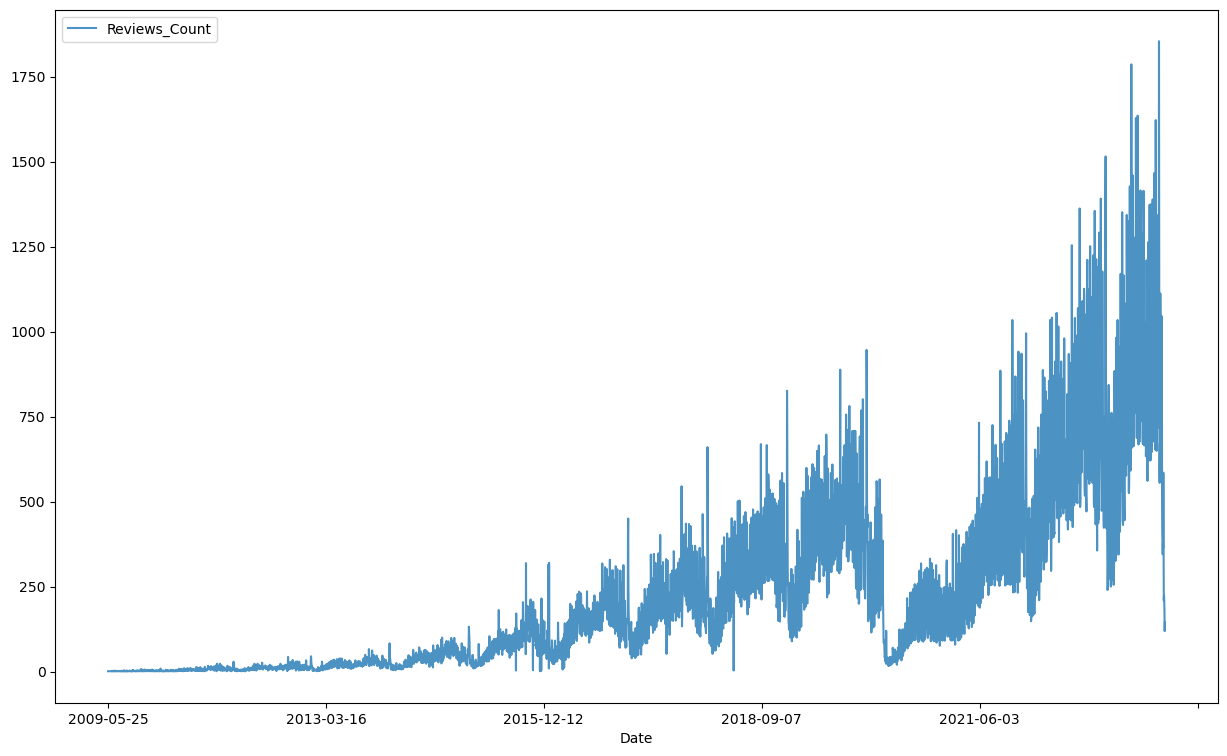

<Figure size 1500x900 with 0 Axes>

In [10]:
# Daily Review Counts
reviews_sorted_df.plot.line(x="Date",y="Reviews_Count", figsize=(15,9), alpha=.8)
plt.figure(figsize=[15,9])

plt.show()

In [12]:
# Convert Date column to datetime and parse into day/month/year columns
unparsed_date_df = reviews_sorted_df.copy() 

unparsed_date_df['Date']= pd.to_datetime(unparsed_date_df['Date'])

unparsed_date_df['day'] = unparsed_date_df['Date'].dt.day
unparsed_date_df['month'] = unparsed_date_df['Date'].dt.month
unparsed_date_df['year'] = unparsed_date_df['Date'].dt.year

unparsed_date_df.head()

,Date,Reviews_Count,day,month,year
4730,2009-05-25,1,25,5,2009
4685,2009-05-28,1,28,5,2009
4731,2009-05-29,1,29,5,2009
4732,2009-06-07,1,7,6,2009
4725,2009-06-14,1,14,6,2009


In [13]:
# Group the new parsed data and convert to annual and monthly counts
parsed_date = unparsed_date_df.copy()

r_month_df = parsed_date[["month", "year", "Reviews_Count"]].groupby(by=["year","month"]).sum()
r_year_df = parsed_date[["year", "Reviews_Count"]].groupby(by=["year"]).sum()

r_month_df.head(5)

Reviews_Count
year month               
2009 5                  3
     6                  2
     7                  4
     8                  5
     10                 6

In [14]:
# Create a number sequence for the monthly counts
r_my_df = r_month_df.copy()

num_month_list = [x for x in range(len(r_my_df))]

r_my_df["month_num"] = num_month_list

# drop last month - October 2023 has only one day of data
r_my_df.drop(r_my_df.tail(1).index,
        inplace = True)

# display(num_month_list)
r_my_df.head(5)

Reviews_Count  month_num
year month                          
2009 5                  3          0
     6                  2          1
     7                  4          2
     8                  5          3
     10                 6          4

In [101]:
# reset index and combine date column for months
# r_my_df = r_month_df.copy()

# r_my_df = r_my_df.reset_index()
# r_my_df["Date"] = r_my_df['year'] + (r_my_df['month']/100)

# r_my_df = r_my_df[["Date", "Reviews_Count"]]

# r_my_df.head(25)

In [15]:
# reset index and combine date column for annual counts
r_y_df = r_year_df.copy()
r_y_df = r_y_df.reset_index()

# drop 2023, an incomplete year missing 3 months of data
r_y_df.drop(r_y_df.tail(1).index,
        inplace = True)

# Add years for possible forecasting
more_years = pd.DataFrame(data = {'year': [2023, 2024, 2025], 'Reviews_Count': [None, None, None]})
r_xyears_df = pd.concat([r_y_df, more_years])

r_xyears_df.tail()

,year,Reviews_Count
12,2021,114240
13,2022,211168
0,2023,None
1,2024,None
2,2025,None


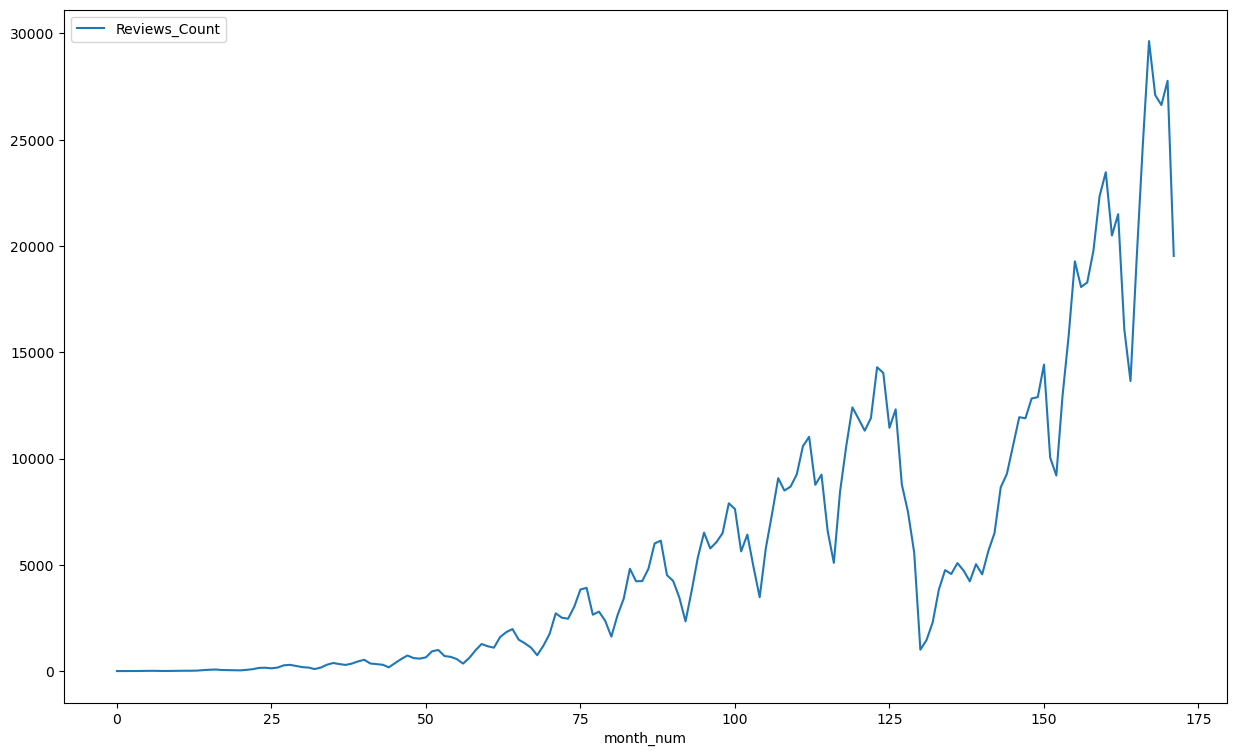

<Figure size 1500x900 with 0 Axes>

In [16]:
# monthly plot
r_my_df.plot.line(x="month_num",y="Reviews_Count", figsize=(15,9))
plt.figure(figsize=[15,9])

plt.show()

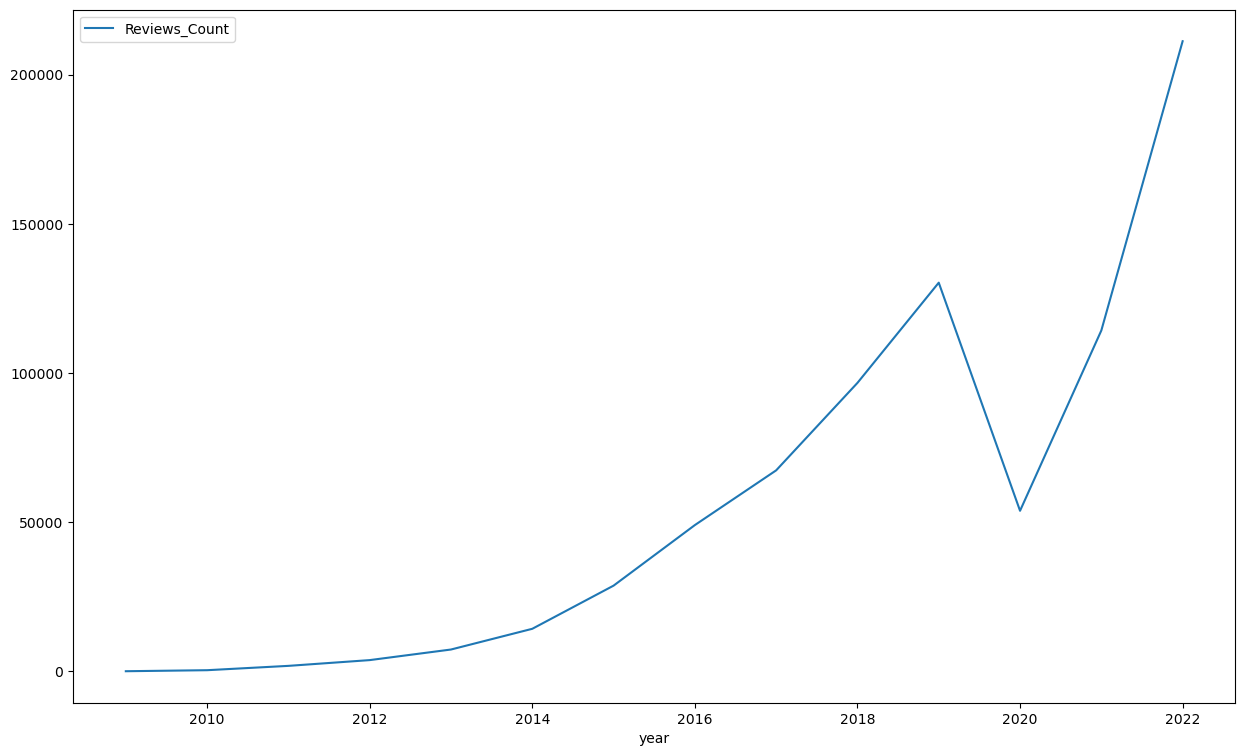

<Figure size 1500x900 with 0 Axes>

In [17]:
# annual count of reviews
r_xyears_df.plot.line(x="year",y="Reviews_Count", figsize=(15,9))
plt.figure(figsize=[15,9])

plt.show()